In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Fuzzy Inference Process
![Alt Text](../images/FIP_00.png)

* **Fuzzification**: Translate input into truth values
* **Rule Evaluation**: Compute output truth values
* **Defuzzification**: Transfer truth values into output

### 1. Fuzzification
Input variables are assigned degrees of membership in various classes

The purpose of fuzzification is to **map the inputs** from a set of sensors (or
features of those sensors) **to values from 0 to 1** using a set of input
**membership functions**.

Fuzzy Sets = { Negative, Zero, Positive }

In [2]:
def F_negative(x):
    x1_r = [0.5 , 0]
    x2_r = [-0.5, 1]
    a_r = (x1_r[1]-x2_r[1])/(x1_r[0]-x2_r[0])
    b_r = x1_r[1] - a_r*x1_r[0]
    
    x1_l = [-3 , 0]
    x2_l = [-2.5, 1]
    a_l = (x1_l[1]-x2_l[1])/(x1_l[0]-x2_l[0])
    b_l = x1_l[1] - a_l*x1_l[0]    
    
    if x >= 0.5:
        return 0.0
    elif x <= -3.0:
        return 0.0
    elif -2.5 <= x <= -0.5:
        return 1.0
    elif -0.5 < x < 0.5:
        return a_r*x + b_r
    elif -3.0 < x < -2.5:
        return a_l*x + b_l

In [3]:
def F_zero(x):
    if x >= 1.0:
        return 0.0
    elif x <= -1.0:
        return 0.0
    elif -0.25 <= x <= 0.25:
        return 1.0
    elif 0.25 < x < 1.0:
        return -4.0/3*x + 4.0/3
    elif -1 < x < -0.25:
        return 4.0/3*x + 4.0/3

In [4]:
def F_positive(x):
    x1_r = [3 , 0]
    x2_r = [2.5, 1]
    a_r = (x1_r[1]-x2_r[1])/(x1_r[0]-x2_r[0])
    b_r = x1_r[1] - a_r*x1_r[0]
    
    x1_l = [-0.5 , 0]
    x2_l = [0.5, 1]
    a_l = (x1_l[1]-x2_l[1])/(x1_l[0]-x2_l[0])
    b_l = x1_l[1] - a_l*x1_l[0]    
    
    if x >= 3.0:
        return 0.0
    elif x <= -0.5:
        return 0.0
    elif 0.5 <= x <= 2.5:
        return 1.0
    elif 2.5 < x < 3.0:
        return a_r*x + b_r
    elif -0.5 < x < 0.5:
        return a_l*x + b_l

In [5]:
x = np.linspace(-3, 3, 200)
vfunc  = np.vectorize(F_negative)
yn = vfunc(x)
vfunc  = np.vectorize(F_zero)
y0 = vfunc(x)
vfunc  = np.vectorize(F_positive)
yp = vfunc(x)

(0, 1.5)

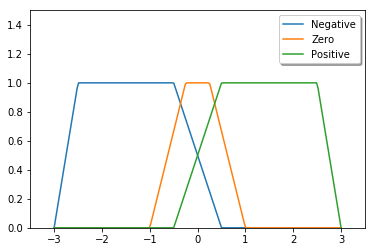

In [6]:
fig, ax = plt.subplots()
ax.plot(x, yn, label='Negative')
ax.plot(x, y0, label='Zero')
ax.plot(x, yp, label='Positive')
ax.legend(loc='upper right', shadow=True)
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((0, 1.5))

#### Case 1. Crisp Input: X = 0.25

(0, 1.5)

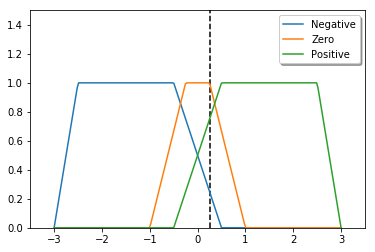

In [7]:
fig, ax = plt.subplots()
ax.axvline(x=0.25, color='black', linestyle='dashed')
ax.plot(x, yn, label='Negative')
ax.plot(x, y0, label='Zero')
ax.plot(x, yp, label='Positive')
ax.legend(loc='upper right', shadow=True)
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((0, 1.5))

In [8]:
print('Zero: ',F_zero(0.25))
print('Positive: ',F_positive(0.25))
print('Negative: ',F_negative(0.25))

Zero:  1.0
Positive:  0.75
Negative:  0.25


#### Case 2. Crisp Input: Y = -0.25

(0, 1.5)

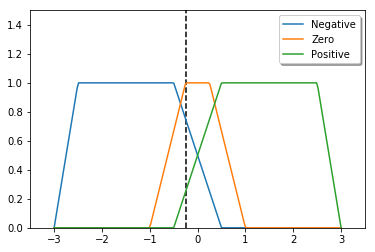

In [9]:
fig, ax = plt.subplots()
ax.axvline(x=-0.25, color='black', linestyle='dashed')
ax.plot(x, yn, label='Negative')
ax.plot(x, y0, label='Zero')
ax.plot(x, yp, label='Positive')
ax.legend(loc='upper right', shadow=True)
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((0, 1.5))

In [10]:
print('Zero: ',F_zero(-0.25))
print('Positive: ',F_positive(-0.25))
print('Negative: ',F_negative(-0.25))

Zero:  1.0
Positive:  0.25
Negative:  0.75


### 2. Rule Evaluation
Inputs are applied to a set of **if/then** control rules.

```
If (input1 is membership function1) and/or (input2 is membership function2) and/or ….
    Then (output is output membership function).
```

The results of various rules are **summed together** to generate a set of “fuzzy outputs”.

**Fuzzy Associative Memory Matrix**:



|   |          |          | X    |          |
|---|----------|----------|------|----------|
|   |          | Negative | Zero | Positive |
|   | Negative | **NL**       | **NS**   | **NS**       |
| Y | Zero     | **NS**       | **ZE**   | **PS**       |
|   | Positive | **PS**       | **PS**   | **PL**       |

NL = -5      
NS = -2.5      
ZE = 0      
PS = 2.5      
PL = 5      

Assuming that we are using the **conjunction operator (AND)** in the
antecedents of the rules, we calculate the rule firing strength $W_n$.

|   |    | X  |    |
|---|----|----|----|
|   | W1 | W4 | W7 |
| Y | W2 | W5 | W8 |
|   | W3 | W6 | W9 |

In [11]:
NL = -5
NS = -2.5
ZE = 0
PS = 2.5
PL = 5

In [12]:
FAMM = np.array([[NL, NS, NS],[NS, ZE, PS],[PS, PS, PL]])
FAMM

array([[-5. , -2.5, -2.5],
       [-2.5,  0. ,  2.5],
       [ 2.5,  2.5,  5. ]])

In [13]:
W1 = min(F_negative(0.25),F_negative(-0.25))
W2 = min(F_negative(0.25),F_zero(-0.25))
W3 = min(F_negative(0.25),F_positive(-0.25))
W4 = min(F_zero(0.25),F_negative(-0.25))
W5 = min(F_zero(0.25),F_zero(-0.25))
W6 = min(F_zero(0.25),F_positive(-0.25))
W7 = min(F_positive(0.25),F_negative(-0.25))
W8 = min(F_positive(0.25),F_zero(-0.25))
W9 = min(F_positive(0.25),F_positive(-0.25))

In [14]:
W = np.array([[W1,W4,W7],[W2,W5,W8],[W3,W6,W9]])
print(W)

[[0.25 0.75 0.75]
 [0.25 1.   0.75]
 [0.25 0.25 0.25]]


### 3. Defuzzification
Fuzzy outputs are combined into discrete values needed to drive the control mechanism

In [15]:
Output = np.sum(np.multiply(FAMM,W))/np.sum(W)
Output

-0.2777777777777778